# London Free Transport

In [1]:
# Project outline

In [2]:
# Contents

In [3]:
# Overview

In [4]:
# About the data

https://data.london.gov.uk/dataset/free-travel-means-everything-to-me

## Data Reading & Checking

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set DataFrame options
pd.set_option('display.max_columns', 150)

In [6]:
# Read data
df = pd.read_csv('data/transport_data.csv')

In [7]:
# Check data
df.head()

,What is your gender?,Other,How old are you?,Do you live in London?,How would you describe your ethnicity?,Other.1,Do you consider yourself to have a disability?,Are you a care experienced person?,Did you hear that the government is planning to cut free travel for under-18s in London?,Do you approve or disapprove the decision to cut free travel for under-18s in London?,How important is free transport in London for you?,How many buses / tubes / trams do you currently take to get to school or college?,How do you get to school or college?,Other.2,"If you have to pay for transport, will it change how you get to school or college?","If you have to pay for transport, how are you planning to get to school or college?",Other.3,"If you lose free travel, would this change the college or school you are considering attending?","Please describe what free transport means to you in a word, or words?","“If I lose free travel, I won’t travel out of my area as much unless I have to”","“If I lose free travel, I am worried getting to school/around London is less safe”","“If I lose free travel, I will cycle instead to the places I want to go”","“If I lose free travel, I can still afford to go to the places I want to go to”","“If I lose free travel, I am worried my parents will struggle to make ends meet”","“If I lose free travel, my mental health with suffer”",Museums,Art galleries,Shopping centres,Parks and green spaces,Areas outside your local borough or area,Sports clubs,Friends and family,"Where else would you visit less than you do now, if you had to pay for travel?"
0,Male,NaN,16,Yes,White British,NaN,No,Yes,No,Dissaprove,5,More than three,Train,NaN,Yes,NaN,"Car, which will mean my brother cannot get to ...",Yes,It means I can go around stress free and knowi...,4,2,3,2,3,4,1,1,3,4,2,2,3,I would visit my dentist less
1,Male,NaN,16,Yes,Any other White background,NaN,No,No,Yes,Dissaprove,5,One,Cycle,NaN,Yes,Cycle,NaN,Not sure,Financial freedom to get to wherever I need in...,4,4,5,1,2,4,1,1,4,5,1,4,4,Zero waste shops
2,Female,NaN,17,Yes,Mixed - White and Black African,NaN,No,No,Yes,Dissaprove,5,One,Bus,NaN,Yes,Walk,NaN,Yes,Opportunity,5,5,1,1,5,5,1,1,2,4,1,1,2,Youth clubs which is bad because it’s where I ...
3,Female,NaN,16,Yes,Any other White background,NaN,No,No,Yes,Dissaprove,5,Two,Train,NaN,Yes,Train,NaN,Not sure,It helps my family save money as we are financ...,3,4,1,2,3,4,3,3,4,4,2,3,4,Central london
4,Female,NaN,18,Yes,Black or Black British - Black African,NaN,No,No,Yes,Don't know,4,Two,Bus,NaN,No,NaN,NaN,No,Free transport to me is freedom to go where I ...,1,1,1,5,2,1,3,3,5,5,5,3,5,Is probably visit places as much as I do now b...


In [8]:
# View shape of data
df.shape

(2236, 33)

In [9]:
# Check types of data
df.dtypes

What is your gender?                                                                                object
Other                                                                                              float64
How old are you?                                                                                     int64
Do you live in London?                                                                              object
How would you describe your ethnicity?                                                              object
Other.1                                                                                             object
Do you consider yourself to have a disability?                                                      object
Are you a care experienced person?                                                                  object
Did you hear that the government is planning to cut free travel for under-18s in London?            object
Do you approve or disapprove the deci

In [10]:
# Look at list of columns in data
df.columns

Index(['What is your gender?', 'Other', 'How old are you?',
       'Do you live in London?', 'How would you describe your ethnicity?',
       'Other.1', 'Do you consider yourself to have a disability?',
       'Are you a care experienced person?',
       'Did you hear that the government is planning to cut free travel for under-18s in London?',
       'Do you approve or disapprove the decision to cut free travel for under-18s in London?',
       'How important is free transport in London for you?',
       'How many buses / tubes / trams do you currently take to get to school or college?',
       'How do you get to school or college?', 'Other.2',
       'If you have to pay for transport, will it change how you get to school or college?',
       'If you have to pay for transport, how are you planning to get to school or college?',
       'Other.3',
       'If you lose free travel, would this change the college or school you are considering attending?',
       'Please describe what free t

In [11]:
# Look at target column
df.iloc[:, 9].unique()

array(['Dissaprove', "Don't know", 'Approve'], dtype=object)

In [12]:
df.iloc[:, 9]

0       Dissaprove
1       Dissaprove
2       Dissaprove
3       Dissaprove
4       Don't know
           ...    
2231    Dissaprove
2232    Dissaprove
2233    Dissaprove
2234    Dissaprove
2235    Dissaprove
Name: Do you approve or disapprove the decision to cut free travel for under-18s in London?, Length: 2236, dtype: object

In [13]:
# Fix spelling of Dissaprove
df.loc[df.iloc[:, 9] == "Dissaprove", df.columns[9]] = "Disapprove"

In [14]:
total = df.shape[0]
disapprove = df[df.iloc[:, 9] == "Disapprove"]
approve = df[df.iloc[:, 9] == "Approve"]
dont_know = df[df.iloc[:, 9] == "Don't know"]

print(f"Disapprove:\t {round(len(disapprove)/total*100, 2)}%")
print(f"Approve:\t {round(len(approve)/total*100,2)}%")
print(f"Don't Know:\t {round(len(dont_know)/total*100, 2)}%")

Disapprove:	 95.44%
Approve:	 2.28%
Don't Know:	 2.28%


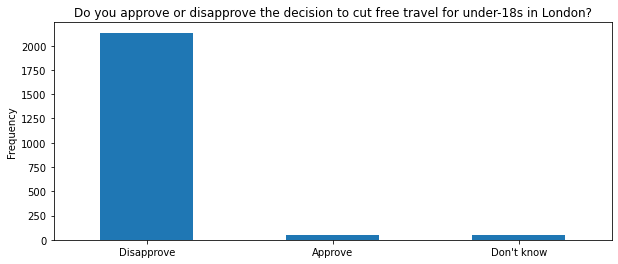

In [15]:
# Plot class distribution
labels = ["Disapprove", "Approve", "Don't know"]
classes = df.iloc[:, 9].value_counts()
plt.figure(figsize=(10,4))
classes.plot(kind='bar', rot=0)
plt.title(f"{df.columns[9]}")
plt.xticks(range(3), labels)
plt.ylabel("Frequency");

In [16]:
# Add manual index to columns to make them easier to reference
df.columns = [f'{i}_{x}' for i, x in enumerate(df.columns)]

In [17]:
# Check for duplicate data
df.duplicated().sum()

0

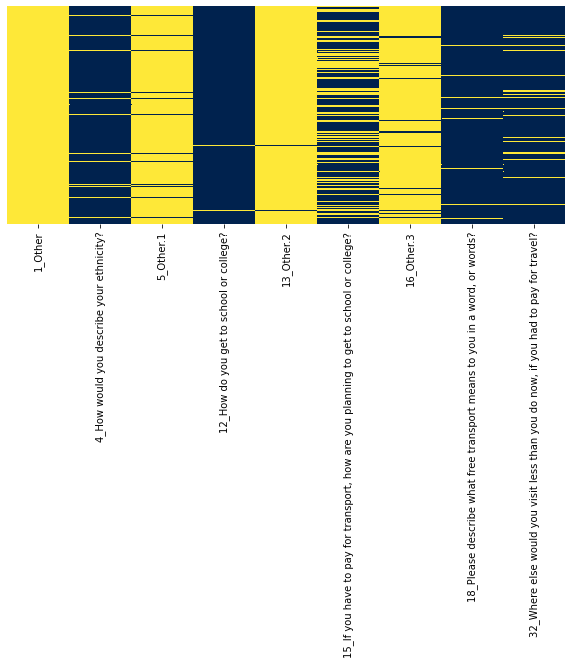

In [18]:
# Visualise missing data for features which have missing data
plt.figure(figsize=(10,4))
sns.heatmap(df.loc[:, df.isnull().any()].isnull(), yticklabels=False, cbar=False, cmap='cividis');

In [19]:
# Look at percentage of nulls
round(df.loc[:, df.isnull().any()].isnull().sum()/df.shape[0]*100, 2)
# or
# round(df.loc[:, df.isnull().any()].isnull().mean()*100,2)

1_Other                                                                                   100.00
4_How would you describe your ethnicity?                                                    4.83
5_Other.1                                                                                  95.17
12_How do you get to school or college?                                                     1.21
13_Other.2                                                                                 98.79
15_If you have to pay for transport, how are you planning to get to school or college?     35.60
16_Other.3                                                                                 91.82
18_Please describe what free transport means to you in a word, or words?                    4.20
32_Where else would you visit less than you do now, if you had to pay for travel?           8.99
dtype: float64

### Columns 4 & 5

In [20]:
# Look at all unique values for column 4 - ethnicity
df.iloc[:, 4].unique()

array(['White British', 'Any other White background',
       'Mixed - White and Black African',
       'Black or Black British - Black African',
       'Asian or Asian British – Indian', nan, 'Prefer Not to Say',
       'Any other Mixed background', 'Mixed - White and Black Caribbean',
       'Black or Black British – Black Caribbean',
       'Asian or Asian British – Bangladeshi', 'Mixed - White and Asian',
       'Asian or Asian British - Any other Asian background',
       'Asian or Asian British – Pakistani',
       'Black or Black British - Any other Black background', 'Chinese'],
      dtype=object)

In [21]:
# Look at some of the answers that have been given as Other for ethnicity
df[df.iloc[:,5].notnull()].iloc[:,5]

10                   Caribbean
16                     Kurdish
27                  Bulgarian 
52      Latino/South American 
70                 Sri Lankan 
                 ...          
2175                    Latino
2190           Latin American 
2200                Brazilian 
2221                   Turkish
2222                Sri lankan
Name: 5_Other.1, Length: 108, dtype: object

In [22]:
# Count of 'Other' ethnicities
df.iloc[:, 5].value_counts()

Arab                       8
Latino                     6
Turkish Cypriot            3
Kurdish                    3
Turkish                    3
                          ..
White Latino               1
Berber                     1
Eastern European white     1
Iraqi                      1
arab british               1
Name: 5_Other.1, Length: 75, dtype: int64

In [23]:
# Fill all null values in column 4 with 'Other'
df.iloc[:, 4].fillna('Other', inplace=True)

### Columns 12 & 13

In [24]:
# Look at all unique values in column 12
df.iloc[:, 12].unique()

array(['Train', 'Cycle', 'Bus', 'Tube', 'Walk', nan], dtype=object)

In [25]:
# View null values in column 12
# df[df.iloc[:, 12].isnull()].head()

In [26]:
# Check if there are any intances where 12 and 13 contain values
any(df.iloc[:, 12].notnull() & df.iloc[:, 13].notnull())

False

In [27]:
# View answers given as 'Other'
df[df.iloc[:, 13].notnull()].iloc[:, 13]

42                            Car
94           train, tube and walk
120                           Car
175                         Coach
220              Walk, bus + tube
495                  bus and tube
672                        Drive 
703                           Car
795                Bus and train 
896                           Car
980                Train and bus 
998                           car
1047                         Tram
1212                Bus and Train
1225                 Bus and walk
1426                Bus and train
1434         Bus , train and walk
1468                          Car
1720                          Car
1770                          Car
1860           College transport 
1871                        Tram 
1888               Bus and trains
2024             Several of these
2103    Local Authority transport
2171           Both train and bus
2217                        Coach
Name: 13_Other.2, dtype: object

In [28]:
# Make a list of all the instances which have null data in column 12
null_q12 = df[df.iloc[:,12].isnull()].index.tolist()

In [29]:
# Use data from column 13 to impute missing values in column 12
for index in null_q12:
    if 'and' in df.iloc[index, 13].lower() or 'several' in df.iloc[index, 13].lower() or '+' in df.iloc[index, 13].lower():
        df.iloc[index, 12] = 'Multiple'
    elif 'car' in df.iloc[index, 13].lower() or 'drive' in df.iloc[index, 13].lower():
        df.iloc[index, 12] = 'Car'
    else:
        df.iloc[index, 12] = 'Other'

In [30]:
# View columns 12 and 13 for instances that were imputed
df.iloc[null_q12, :].iloc[:,12:14]

,12_How do you get to school or college?,13_Other.2
42,Car,Car
94,Multiple,"train, tube and walk"
120,Car,Car
175,Other,Coach
220,Multiple,"Walk, bus + tube"
495,Multiple,bus and tube
672,Car,Drive
703,Car,Car
795,Multiple,Bus and train
896,Car,Car


### Columns 15 & 16

In [31]:
# View unique values in column 15
df.iloc[:, 15].unique()

array([nan, 'Cycle', 'Walk', 'Train', 'Bus', 'Tube'], dtype=object)

In [32]:
# Value counts of column 15 including null values
df.iloc[:, 15].value_counts(dropna=False)

NaN      796
Walk     633
Bus      375
Train    198
Cycle    196
Tube      38
Name: 15_If you have to pay for transport, how are you planning to get to school or college?, dtype: int64

In [33]:
# View count of data in column 16
len(df[df.iloc[:, 16].notnull()].iloc[:, 16])

183

In [34]:
# Make a list of all the instances which have null data in column 15
null_q15 = df[df.iloc[:,15].isnull()].index.tolist()

In [35]:
# Check if there are any intances where 15 and 16 contain values
any(df.iloc[:, 15].notnull() & df.iloc[:, 16].notnull())

False

In [36]:
# View some of the data given in column 16
df[df.iloc[:,16].notnull()].iloc[:, 16].values[:50]

array(['Car, which will mean my brother cannot get to school in time if I do',
       'Get driven/take the school bus', 'Car', 'No school',
       'Possible buying a car ', 'Cab', 'car', 'i don’t know ', 'Car',
       'Not going too', 'car', 'Car',
       "I don't know, don't have enough money, dont kno e how to ride a bike and walking will take an hour ",
       "I'd have to get driven by my parents which would mess up our timing in the mornings and they would be late for work",
       'car', 'Car', 'Taxi', 'Car', 'Walk for 1 hour no thanks ?',
       'Driven by family if available or a cab', 'Skate',
       'I’m not going school ', 'car', 'Car or uber', 'Car', 'Car', 'Car',
       'Car', 'mix of walkin and public transport ', 'carpooling',
       'I don’t know yet ', 'Car ', 'Car', 'Skateboarding ',
       "I don't know still need to figure it out", 'Mum dropping me off',
       'Car', 'Taxi', 'Car', 'Drive', 'Drive', 'Car', 'Taxi', 'Car',
       'Skate', 'Car', 'Scooter',
       'Wi

In [37]:
# Use data from column 16 to impute some of the missing values in column 15
for index in null_q15:
    if pd.isnull(df.iloc[index, 16]):
        continue
    if 'car' in df.iloc[index, 16].lower() or 'driv' in df.iloc[index, 16].lower() or 'lift' in df.iloc[index, 16].lower():
        df.iloc[index, 15] = 'Car'
    elif 'taxi' in df.iloc[index, 16].lower() or 'cab' in df.iloc[index, 16].lower():
        df.iloc[index, 15] = 'Taxi'

In [38]:
# View columns 15 and 16 for instances that were imputed
df.iloc[null_q15, 15:17].dropna().head(15)

,"15_If you have to pay for transport, how are you planning to get to school or college?",16_Other.3
0,Car,"Car, which will mean my brother cannot get to ..."
9,Car,Get driven/take the school bus
22,Car,Car
35,Car,Possible buying a car
55,Taxi,Cab
90,Car,car
117,Car,Car
143,Car,car
144,Car,Car
188,Car,I'd have to get driven by my parents which wou...


### Column 18

In [39]:
# Look at some of the values for column 18
df.iloc[:, 18].values[:15]

array(['It means I can go around stress free and knowing my family can have savings to eat and drink',
       'Financial freedom to get to wherever I need in London.',
       'Opportunity',
       'It helps my family save money as we are financially struggling',
       'Free transport to me is freedom to go where I need to go',
       'Vital', 'A lifeline', 'freedom of movement',
       'It allows us to explore, to not have to worry about the many other things that cost money in this economy. Free travel helps me so much, more than words can ever say',
       'free travel allows me to get to school cheaper as well as giving me the opportunity to be more independent as I am not asking my parents to drive me or give me money',
       "It's easier for me cause I can use the money that I don't use in the transport for an other thing like school's meals ir something like that",
       'Important', 'Essential', 'hhh',
       'It helps me get around a lot of places including education centres

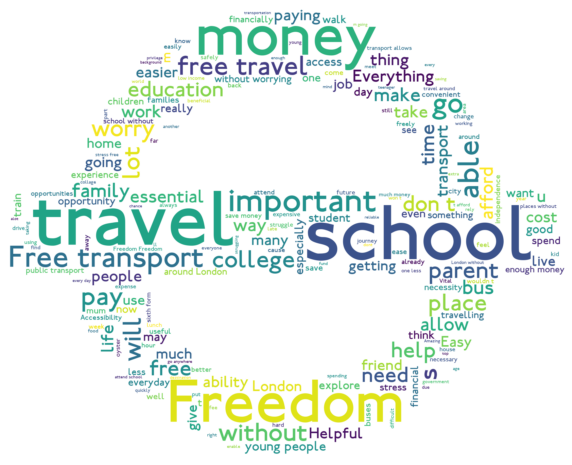

In [40]:
# Create wordcloud for column 18
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Set up text
q18_answers = df[df.iloc[:,18].notnull()].iloc[:,18]
text = " ".join(word for word in q18_answers)

# Generate a word cloud image
stop_words = ["mean", "means"] + list(STOPWORDS)
font_path = "fonts/London_Underground_Normal.ttf"
mask = np.array(Image.open('images/underground.png'))
wordcloud = WordCloud(stopwords=stop_words, mask=mask, font_path=font_path, random_state=2, background_color="white", width=600, height=300)
wordcloud.generate(text)

# Display the generated image
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Remove Unnecessary Columns

In [41]:
# Remove columns 18 and 32
# df = df.drop(df.columns[[18, 32]], axis=1)

In [42]:
# Remove columns with null values
# df = df.dropna(thresh=len(df)-2000, axis=1)
df = df.dropna(axis=1)

In [43]:
# Reset manual index
df.columns = [f"{i}_{x.split('_')[1]}" for i, x in enumerate(df.columns)]

In [44]:
# Check nulls for each column
df.isnull().sum()

0_What is your gender?                                                                                0
1_How old are you?                                                                                    0
2_Do you live in London?                                                                              0
3_How would you describe your ethnicity?                                                              0
4_Do you consider yourself to have a disability?                                                      0
5_Are you a care experienced person?                                                                  0
6_Did you hear that the government is planning to cut free travel for under-18s in London?            0
7_Do you approve or disapprove the decision to cut free travel for under-18s in London?               0
8_How important is free transport in London for you?                                                  0
9_How many buses / tubes / trams do you currently take to get to

In [45]:
# Look at data
df.head()

,0_What is your gender?,1_How old are you?,2_Do you live in London?,3_How would you describe your ethnicity?,4_Do you consider yourself to have a disability?,5_Are you a care experienced person?,6_Did you hear that the government is planning to cut free travel for under-18s in London?,7_Do you approve or disapprove the decision to cut free travel for under-18s in London?,8_How important is free transport in London for you?,9_How many buses / tubes / trams do you currently take to get to school or college?,10_How do you get to school or college?,"11_If you have to pay for transport, will it change how you get to school or college?","12_If you lose free travel, would this change the college or school you are considering attending?","13_“If I lose free travel, I won’t travel out of my area as much unless I have to”","14_“If I lose free travel, I am worried getting to school/around London is less safe”","15_“If I lose free travel, I will cycle instead to the places I want to go”","16_“If I lose free travel, I can still afford to go to the places I want to go to”","17_“If I lose free travel, I am worried my parents will struggle to make ends meet”","18_“If I lose free travel, my mental health with suffer”",19_Museums,20_Art galleries,21_Shopping centres,22_Parks and green spaces,23_Areas outside your local borough or area,24_Sports clubs,25_Friends and family
0,Male,16,Yes,White British,No,Yes,No,Disapprove,5,More than three,Train,Yes,Yes,4,2,3,2,3,4,1,1,3,4,2,2,3
1,Male,16,Yes,Any other White background,No,No,Yes,Disapprove,5,One,Cycle,Yes,Not sure,4,4,5,1,2,4,1,1,4,5,1,4,4
2,Female,17,Yes,Mixed - White and Black African,No,No,Yes,Disapprove,5,One,Bus,Yes,Yes,5,5,1,1,5,5,1,1,2,4,1,1,2
3,Female,16,Yes,Any other White background,No,No,Yes,Disapprove,5,Two,Train,Yes,Not sure,3,4,1,2,3,4,3,3,4,4,2,3,4
4,Female,18,Yes,Black or Black British - Black African,No,No,Yes,Don't know,4,Two,Bus,No,No,1,1,1,5,2,1,3,3,5,5,5,3,5


## EDA

 Question: What is your gender?


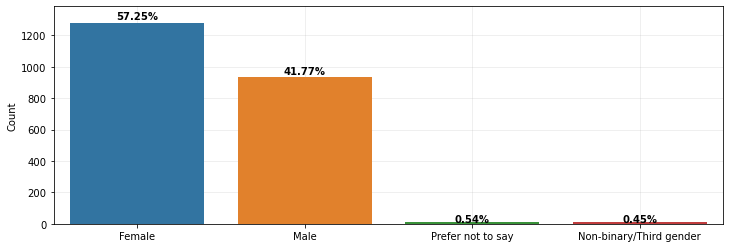

 Question: How old are you?


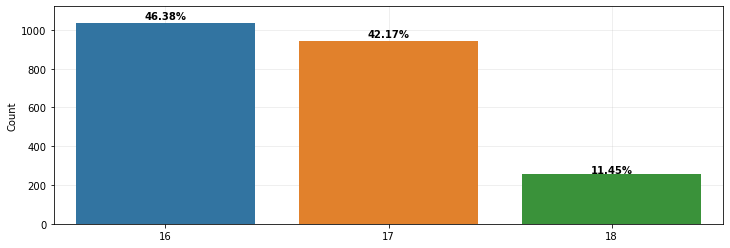

 Question: Do you live in London?


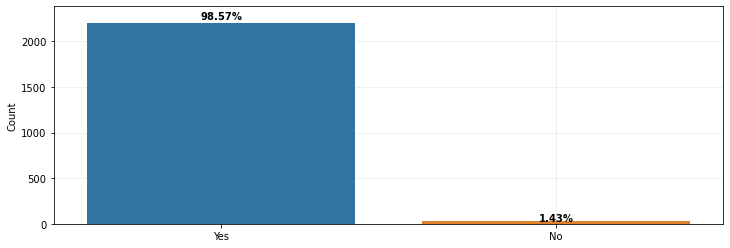

 Question: How would you describe your ethnicity?


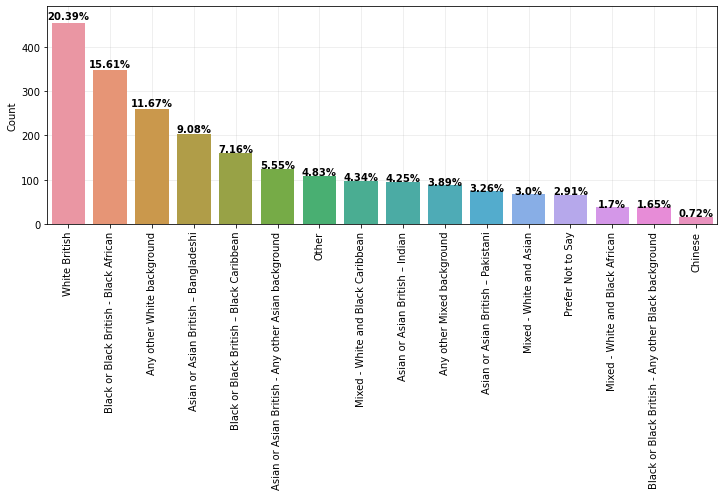

 Question: Do you consider yourself to have a disability?


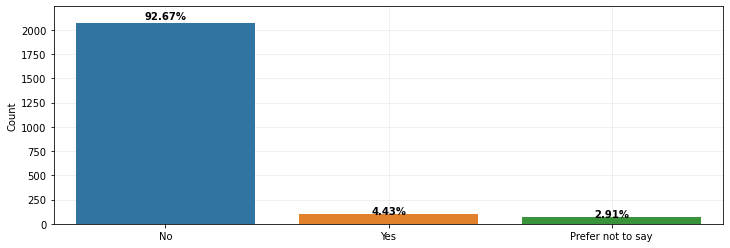

 Question: Are you a care experienced person?


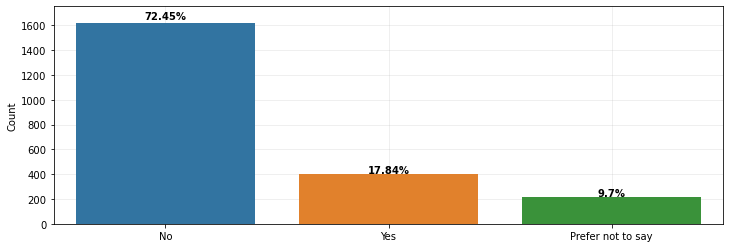

In [46]:
# View plots for demographic features
total = df.shape[0]
for feature in df.columns[:6]:
    feature_num = df[feature].value_counts()
    print(f"\033[1m Question: {feature.split('_')[1]}")
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x=feature_num.index, y=feature_num, zorder=2)  
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round((height/total)*100,2)}%', (x+width/2, y+height*1.02), ha='center', weight='bold')
    if 'ethnicity' in feature:
        plt.xticks(rotation=90)
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax*1.03)
    plt.ylabel('Count')
    plt.grid(alpha=.25)
    plt.show()

 Question: Did you hear that the government is planning to cut free travel for under-18s in London?


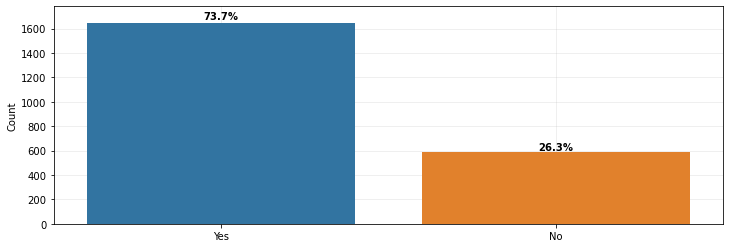

 Question: Do you approve or disapprove the decision to cut free travel for under-18s in London?


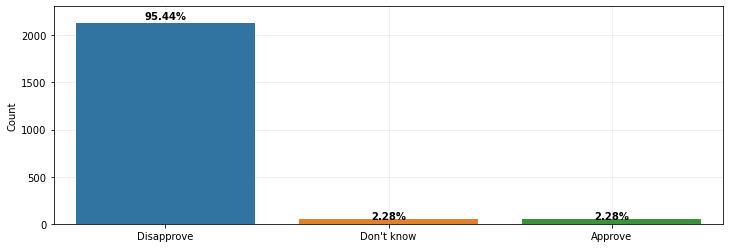

 Question: How important is free transport in London for you?


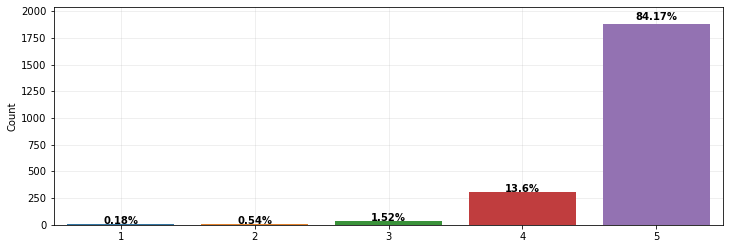

 Question: How many buses / tubes / trams do you currently take to get to school or college?


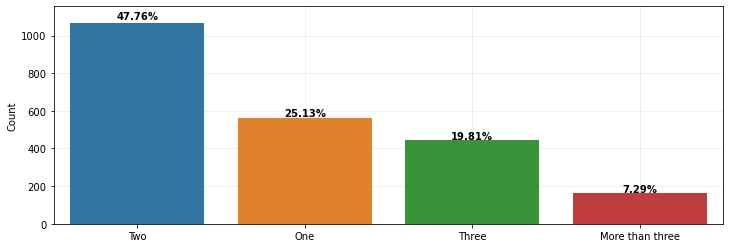

 Question: How do you get to school or college?


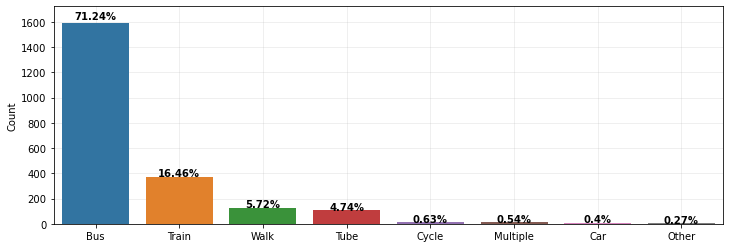

 Question: If you have to pay for transport, will it change how you get to school or college?


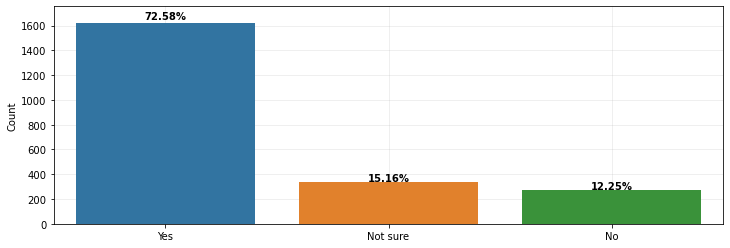

In [47]:
# View plots for more specific questions
for feature in df.columns[6:12]:
    feature_num = df[feature].value_counts()
    print(f"\033[1m Question: {feature.split('_')[1]}")
    plt.figure(figsize=(12,4))
    ax = sns.barplot(x=feature_num.index, y=feature_num, zorder=2)  
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round((height/total)*100,2)}%', (x+width/2, y+height*1.02), ha='center', weight='bold')
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax*1.03)
    plt.ylabel('Count')
    plt.grid(alpha=.25)
    plt.show()

In [ ]:
# Stats on who approves vs who disapproves

In [48]:
# Create activities df
df_activities = pd.DataFrame()
for i in df.columns[19:]:
    series = df[i].value_counts().sort_index()
    col = i.split('_')[1]
    df_activities[col] = series

In [49]:
# View activities df
df_activities

,Museums,Art galleries,Shopping centres,Parks and green spaces,Areas outside your local borough or area,Sports clubs,Friends and family
1,1103,1181,237,273,679,836,159
2,580,522,577,409,734,528,412
3,346,347,646,563,404,481,641
4,133,126,543,580,226,217,639
5,74,60,233,411,193,174,385


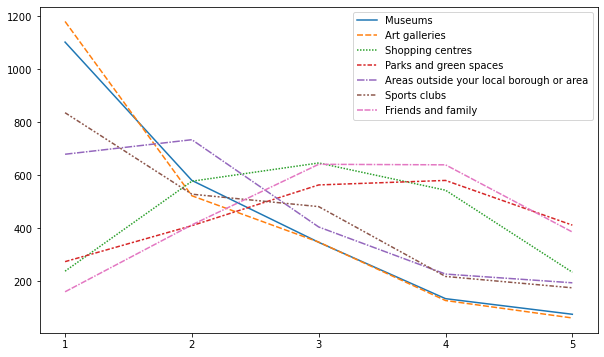

In [50]:
# Plot activities df
plt.figure(figsize=(10,6))
sns.lineplot(data=df_activities)
plt.xticks([*range(1,6)]);

**1** - Would not go anymore  
**2** - Would go far less  
**3** - Not sure  
**4** - Would go a little less  
**5** - Would go the same amount

## Model Building

### Data Preprocessing

In [151]:
# Import models and libraries

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as PipelineImb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [588]:
# Remove all rows that chose don't know
df_pre = df[df.iloc[:, 7] != "Don't know"]

# Save copy for testing once model has been built
df_dont_know = df[df.iloc[:, 7] == "Don't know"]

In [589]:
# Separate target variable
X = df_pre.drop(df.columns[7], axis=1)
y = df_pre.iloc[:, 7]

In [590]:
# Label encode target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

1 = disapprove  
0 = approve

In [591]:
# Perform One Hot Encoding
# X = pd.get_dummies(X.astype(str), drop_first=True)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
X = enc.fit_transform(X)

In [574]:
X

<2185x96 sparse matrix of type '<class 'numpy.float64'>'
	with 38797 stored elements in Compressed Sparse Row format>

In [348]:
# # Convert X to array
# X_np = np.array(X)
# type(X_np)

numpy.ndarray

In [592]:
# Make custom scorer
custom_scorer = make_scorer(f1_score, average='macro')

In [593]:
# Store model scores & save model with best macro f1 score
model_scores = {}
all_models = []

In [594]:
# Function for evaluating models
def evaluate_model(name, model, params):
    
    # Split data into training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Make pipeline for oversampling
    imbpipe = PipelineImb([
        ('oversample', RandomOverSampler(sampling_strategy=0.1, random_state=42)),
        ('undersample', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
        ('model', model)]
    )

    # Create cross validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Run grid search
    gs = GridSearchCV(estimator=imbpipe, param_grid=params, cv=skf, scoring=custom_scorer)

    # Fit gs
    gs.fit(X_train, y_train)

    # Best estimator
    print(gs.best_params_)
    best_pipe = gs.best_estimator_
    
    # Cross val scores for f1
    scores = cross_val_score(best_pipe, X_train, y_train, scoring=custom_scorer, cv=skf, n_jobs=-1)
    print("-"*80)
    print(f'{name}:')
    print(f'Average f1-Score for Training Data:\t {np.mean(scores):.3f}')

    # Make predictions (samplers are only applied during fit thus we can use the imblearn pipeline to predict)
    y_pred = best_pipe.predict(X_test)
    
    # Scores
    precision = round(precision_score(y_test, y_pred, pos_label=0),2)
    recall = recall_score(y_test, y_pred, pos_label=0)
    macro_f1 = round(f1_score(y_test, y_pred, average="macro"),3)
    model_scores[name] = (precision, recall, macro_f1)
    all_models.append((best_pipe[2], macro_f1))

    # Output
    print(f'\nPrecision Score for Test Data:\t\t {precision:.2f}')
    print(f'Recall Score for Test Data:\t\t {recall:.2f}')
    print(f'Macro Average f1-score on Test Data:\t {macro_f1:.3f}')
    print("-"*55,"\n")
    print(classification_report(y_test, y_pred))
    print("-"*55)
    
    # Plots
    fig, ax = plt.subplots(1, 3, figsize=(15,4))
    plot_confusion_matrix(best_pipe, X_test, y_test, colorbar=False, ax=ax[0])
    plot_roc_curve(best_pipe, X_test, y_test, pos_label=0, name=name, ax=ax[1])
    plot_precision_recall_curve(best_pipe, X_test, y_test, pos_label=0, name=name, ax=ax[2]);

{'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'poly'}
--------------------------------------------------------------------------------
SVC:
Average f1-Score for Training Data:	 0.569

Precision Score for Test Data:		 0.14
Recall Score for Test Data:		 0.10
Macro Average f1-score on Test Data:	 0.550
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.14      0.10      0.12        10
           1       0.98      0.99      0.98       427

    accuracy                           0.97       437
   macro avg       0.56      0.54      0.55       437
weighted avg       0.96      0.97      0.96       437

-------------------------------------------------------


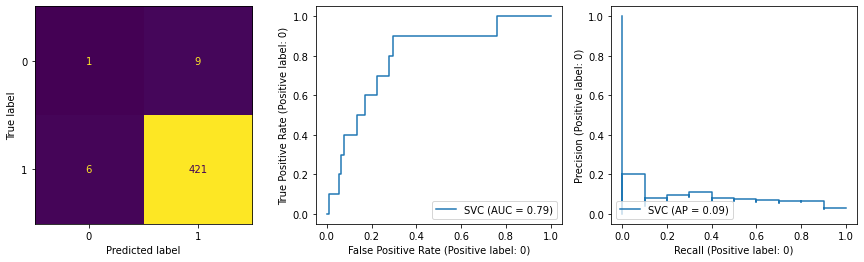

In [595]:
# SVC model
svc = SVC(random_state=42)
params_svc = {
    'model__C' : [10, 1, 0.1, 0.001],
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}
evaluate_model("SVC", svc, params_svc)

{'model__alpha': 10}
--------------------------------------------------------------------------------
Naive Bayes:
Average f1-Score for Training Data:	 0.550

Precision Score for Test Data:		 0.10
Recall Score for Test Data:		 0.50
Macro Average f1-score on Test Data:	 0.555
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.10      0.50      0.17        10
           1       0.99      0.90      0.94       427

    accuracy                           0.89       437
   macro avg       0.54      0.70      0.55       437
weighted avg       0.97      0.89      0.92       437

-------------------------------------------------------


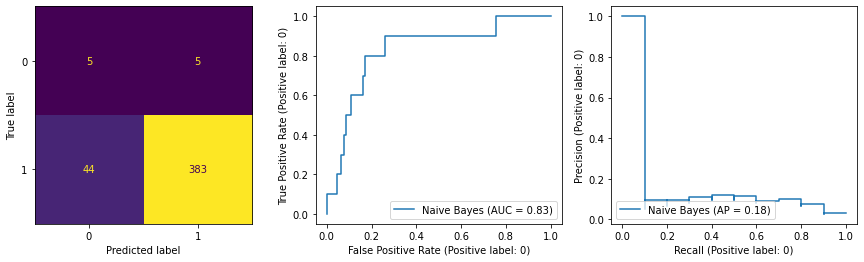

In [596]:
# Naive Bayes model
nb = BernoulliNB()
params_nb = {
    'model__alpha' : [0.1, 1, 10, 100],
}
evaluate_model("Naive Bayes", nb, params_nb)

{'model__max_depth': 6, 'model__min_samples_leaf': 1}
--------------------------------------------------------------------------------
Decision Tree:
Average f1-Score for Training Data:	 0.525

Precision Score for Test Data:		 0.10
Recall Score for Test Data:		 0.30
Macro Average f1-score on Test Data:	 0.555
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.10      0.30      0.15        10
           1       0.98      0.94      0.96       427

    accuracy                           0.92       437
   macro avg       0.54      0.62      0.55       437
weighted avg       0.96      0.92      0.94       437

-------------------------------------------------------


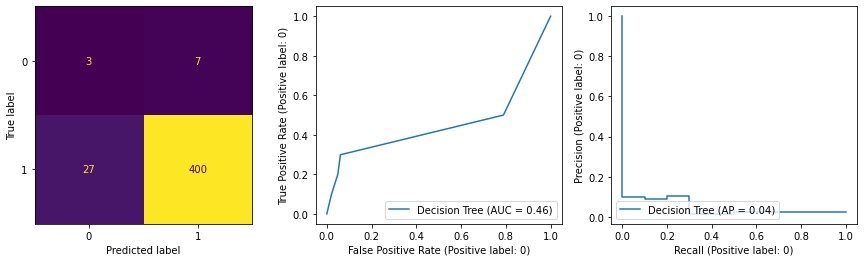

In [597]:
# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
params_dt = {
    'model__max_depth': np.arange(3, 10),
    'model__min_samples_leaf' : np.arange(1, 10)
}
evaluate_model("Decision Tree", dt, params_dt)

{'model__max_depth': 4, 'model__min_samples_leaf': 2}
--------------------------------------------------------------------------------
Random Forest:
Average f1-Score for Training Data:	 0.599

Precision Score for Test Data:		 0.19
Recall Score for Test Data:		 0.30
Macro Average f1-score on Test Data:	 0.604
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.19      0.30      0.23        10
           1       0.98      0.97      0.98       427

    accuracy                           0.95       437
   macro avg       0.59      0.63      0.60       437
weighted avg       0.97      0.95      0.96       437

-------------------------------------------------------


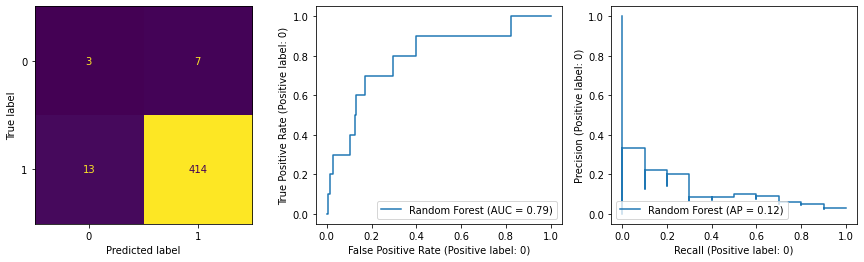

In [598]:
# Random Forest model
rf = RandomForestClassifier(random_state=42)
params_rf = {
    'model__max_depth': np.arange(3, 10),
    'model__min_samples_leaf' : np.arange(1, 10)
}
evaluate_model("Random Forest", rf, params_rf)

{'model__C': 0.1, 'model__solver': 'newton-cg'}
--------------------------------------------------------------------------------
Logistic Regression:
Average f1-Score for Training Data:	 0.532

Precision Score for Test Data:		 0.09
Recall Score for Test Data:		 0.40
Macro Average f1-score on Test Data:	 0.546
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.09      0.40      0.15        10
           1       0.98      0.91      0.94       427

    accuracy                           0.89       437
   macro avg       0.54      0.65      0.55       437
weighted avg       0.96      0.89      0.93       437

-------------------------------------------------------


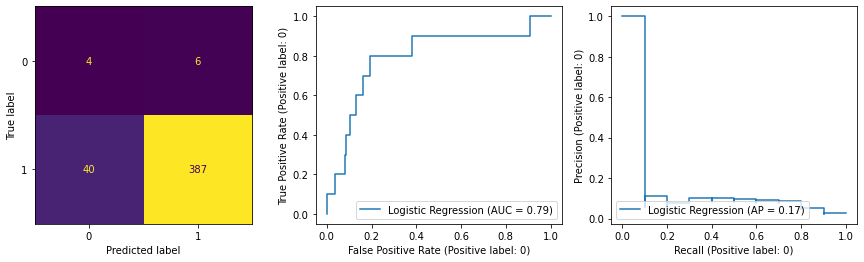

In [599]:
# Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=500)
params_logreg = {
    'model__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'model__C' : [100, 10, 1.0, 0.1]

}
evaluate_model("Logistic Regression", logreg, params_logreg)

{'model__alpha': 0.4}
--------------------------------------------------------------------------------
Ridge Classifier:
Average f1-Score for Training Data:	 0.503

Precision Score for Test Data:		 0.07
Recall Score for Test Data:		 0.50
Macro Average f1-score on Test Data:	 0.523
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.07      0.50      0.13        10
           1       0.99      0.85      0.92       427

    accuracy                           0.85       437
   macro avg       0.53      0.68      0.52       437
weighted avg       0.97      0.85      0.90       437

-------------------------------------------------------


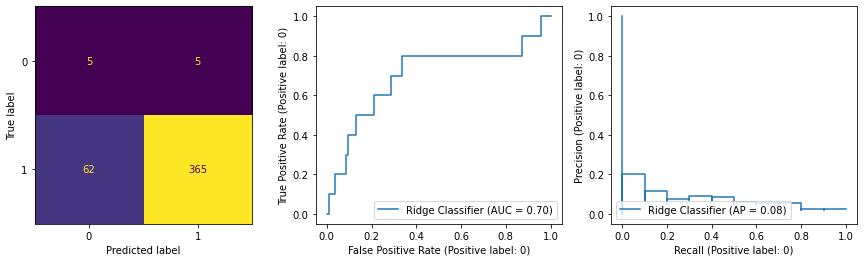

In [600]:
# Ridge Classifier model
ridge = RidgeClassifier(random_state=42)
params_ridge = {
    'model__alpha' : np.arange(0.1, 1.1, 0.1)
}
evaluate_model("Ridge Classifier", ridge, params_ridge)

{'model__n_estimators': 1000}
--------------------------------------------------------------------------------
Bagging Classifier:
Average f1-Score for Training Data:	 0.536

Precision Score for Test Data:		 0.12
Recall Score for Test Data:		 0.20
Macro Average f1-score on Test Data:	 0.560
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.12      0.20      0.15        10
           1       0.98      0.96      0.97       427

    accuracy                           0.95       437
   macro avg       0.55      0.58      0.56       437
weighted avg       0.96      0.95      0.95       437

-------------------------------------------------------


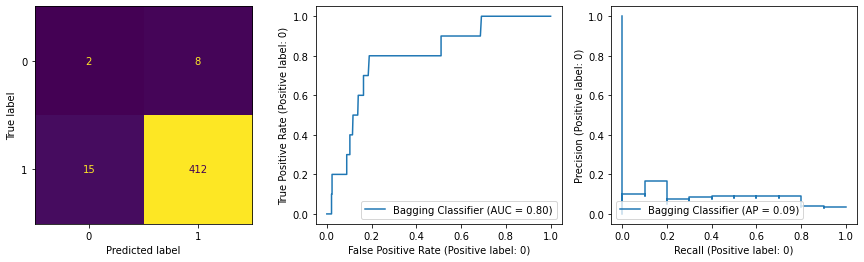

In [601]:
# Bagging Classifier model
bagging = BaggingClassifier(random_state=42)
params_bagging = {
    'model__n_estimators' : [10, 100, 1000]
}
evaluate_model("Bagging Classifier", bagging, params_bagging)

{'model__eval_metric': 'logloss'}
--------------------------------------------------------------------------------
XGBoost:
Average f1-Score for Training Data:	 0.550

Precision Score for Test Data:		 0.18
Recall Score for Test Data:		 0.40
Macro Average f1-score on Test Data:	 0.611
------------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.18      0.40      0.25        10
           1       0.99      0.96      0.97       427

    accuracy                           0.95       437
   macro avg       0.58      0.68      0.61       437
weighted avg       0.97      0.95      0.95       437

-------------------------------------------------------


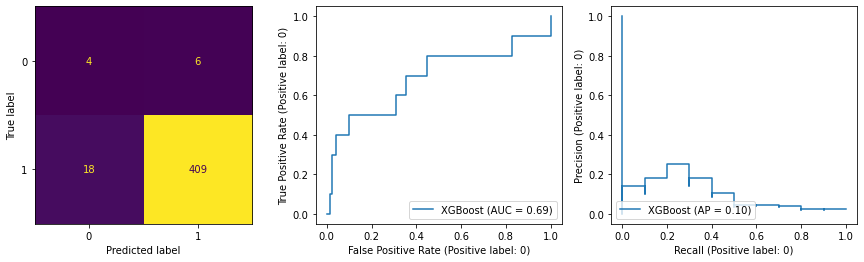

In [602]:
# XGBoost model
xgboost = XGBClassifier(use_label_encoder=False, random_state=42)
params_xgboost = {
    'model__eval_metric' : ['logloss', 'error']
}
evaluate_model("XGBoost", xgboost, params_xgboost)

### Model Evaluation

In [603]:
# Model with best macro f1 score
max(model_scores, key=lambda k: (model_scores[k][2]))

'XGBoost'

In [604]:
# View all model scores
models_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Precision', 'Recall', 'Macro_f1'])
models_df.style.\
    highlight_max(axis=0, color='#b3ff66').\
    format("{:.3}")

,Precision,Recall,Macro_f1
SVC,0.14,0.1,0.55
Naive Bayes,0.1,0.5,0.555
Decision Tree,0.1,0.3,0.555
Random Forest,0.19,0.3,0.604
Logistic Regression,0.09,0.4,0.546
Ridge Classifier,0.07,0.5,0.523
Bagging Classifier,0.12,0.2,0.56
XGBoost,0.18,0.4,0.611


In [605]:
# Extract best model from pipeline
xgb_best = max(all_models, key=lambda x: x[1])[0]

In [524]:
# Pickle best model
import pickle

with open(f'saved_models/london_free_transport_classifier.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)

In [606]:
# Use the don't know set to test out the model

# Separate target variable
X_unknown = df_dont_know.drop(df_dont_know.columns[7], axis=1)

# Perform One Hot Encoding
X_unknown = enc.transform(X_unknown)

# Make predictions
preds_unknown = xgb_best.predict(X_unknown)

# View predictions
preds_unknown

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1])

In [656]:
# Add predictions to dataframe
df_unknown = df_dont_know.copy()
df_unknown.insert(8, 'Prediction', pd.Series(preds_unknown, index=df_unknown.index))
df_unknown['Prediction'] = df_unknown['Prediction'].apply(lambda x : 'Disapprove' if x == 1 else 'Approve')
df_unknown

,0_What is your gender?,1_How old are you?,2_Do you live in London?,3_How would you describe your ethnicity?,4_Do you consider yourself to have a disability?,5_Are you a care experienced person?,6_Did you hear that the government is planning to cut free travel for under-18s in London?,7_Do you approve or disapprove the decision to cut free travel for under-18s in London?,Prediction,8_How important is free transport in London for you?,9_How many buses / tubes / trams do you currently take to get to school or college?,10_How do you get to school or college?,"11_If you have to pay for transport, will it change how you get to school or college?","12_If you lose free travel, would this change the college or school you are considering attending?","13_“If I lose free travel, I won’t travel out of my area as much unless I have to”","14_“If I lose free travel, I am worried getting to school/around London is less safe”","15_“If I lose free travel, I will cycle instead to the places I want to go”","16_“If I lose free travel, I can still afford to go to the places I want to go to”","17_“If I lose free travel, I am worried my parents will struggle to make ends meet”","18_“If I lose free travel, my mental health with suffer”",19_Museums,20_Art galleries,21_Shopping centres,22_Parks and green spaces,23_Areas outside your local borough or area,24_Sports clubs,25_Friends and family
4,Female,18,Yes,Black or Black British - Black African,No,No,Yes,Don't know,Approve,4,Two,Bus,No,No,1,1,1,5,2,1,3,3,5,5,5,3,5
39,Male,16,Yes,Asian or Asian British – Indian,No,No,Yes,Don't know,Approve,4,One,Walk,Not sure,No,3,4,3,3,5,4,1,1,5,5,5,5,4
41,Male,18,Yes,Black or Black British - Black African,No,Yes,Yes,Don't know,Approve,5,Three,Bus,Yes,Yes,5,3,4,4,5,1,4,5,5,5,4,5,4
56,Male,17,Yes,Black or Black British – Black Caribbean,No,Yes,Yes,Don't know,Disapprove,5,Two,Bus,Not sure,No,3,4,1,3,3,4,3,5,3,3,1,1,4
77,Male,17,Yes,Any other White background,No,Yes,No,Don't know,Approve,5,Two,Bus,Yes,Yes,3,4,1,3,4,3,4,3,4,5,5,3,5
97,Female,16,Yes,Other,No,No,Yes,Don't know,Disapprove,5,One,Bus,Yes,No,3,4,2,4,2,2,4,3,5,4,5,5,5
108,Female,18,Yes,Asian or Asian British – Bangladeshi,No,No,Yes,Don't know,Approve,5,Two,Bus,Yes,No,5,5,3,5,5,5,3,4,5,5,5,5,5
127,Male,18,Yes,Any other White background,No,No,Yes,Don't know,Approve,3,Three,Train,No,No,1,2,3,5,1,1,3,3,5,5,5,5,5
142,Male,18,Yes,Mixed - White and Black African,Yes,Yes,No,Don't know,Disapprove,3,Two,Bus,Yes,Yes,3,4,2,4,3,3,3,3,2,3,1,1,2
158,Male,16,Yes,Other,Yes,Yes,No,Don't know,Approve,5,Two,Bus,No,Yes,5,5,5,5,4,3,4,3,5,5,5,5,5


In [657]:
# Value counts
df_unknown['Prediction'].value_counts()

Disapprove    34
Approve       17
Name: Prediction, dtype: int64

In [ ]:
# Stats on who approves vs who disapproves

## Conclusion

## Future Work

---

In [ ]:
############################### TESTING ####################################

In [505]:
model_scores

{'SVC': (0.14, 0.1, 0.55),
 'Naive Bayes': (0.1, 0.5, 0.555),
 'Decision Tree': (0.1, 0.3, 0.555),
 'Random Forest': (0.19, 0.3, 0.604),
 'Logistic Regression': (0.09, 0.4, 0.546),
 'Ridge Classifier': (0.08, 0.5, 0.524),
 'Bagging Classifier': (0.12, 0.2, 0.56),
 'XGBoost': (0.18, 0.4, 0.611)}

In [504]:
# Working ----- Find model with best score
max(model_scores, key=lambda k: (model_scores[k][2]))

'XGBoost'

In [507]:
all_models

[(SVC(C=0.1, gamma=0.1, kernel='poly', random_state=42), 0.55),
 (BernoulliNB(alpha=10), 0.555),
 (DecisionTreeClassifier(max_depth=6, random_state=42), 0.555),
 (RandomForestClassifier(max_depth=4, min_samples_leaf=2, random_state=42),
  0.604),
 (LogisticRegression(C=0.1, max_iter=500, random_state=42, solver='newton-cg'),
  0.546),
 (RidgeClassifier(alpha=0.30000000000000004, random_state=42), 0.524),
 (BaggingClassifier(n_estimators=1000, random_state=42), 0.56),
 (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
                gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
               

In [515]:
# Working ---- extract best scoring model
max(all_models, key=lambda x: x[1])[0]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cbar=False, cmap='cividis');
# plt.title("Confusion Matrix", fontweight='bold')
# plt.ylabel('True class')
# plt.xlabel('Predicted class');

In [ ]:
# ############################## TESTING ###########################################################
# ################ SMOTE #################

# skf = StratifiedKFold(n_splits=5)
# # kf = KFold(n_splits=5)

# for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
#     X_train = X_np[train_index]
#     y_train = y[train_index]
#     X_test = X_np[test_index]
#     y_test = y[test_index]
#     print(f"Before OverSampling, counts of label '1': {sum(y_train==1)}")
#     print(f"Before OverSampling, counts of label '0': {sum(y_train==0)}")
#     sm = SMOTE(random_state=42)
#     X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
# #     print(f'After OverSampling, the shape of X_train: {X_train_oversampled.shape}')
# #     print(f'After OverSampling, the shape of y_train: {y_train_oversampled.shape}')
#     print(f"After OverSampling, counts of label '1': {sum(y_train_oversampled==1)}")
#     print(f"After OverSampling, counts of label '0': {sum(y_train_oversampled==0)}")
    
#     test_df_x = pd.DataFrame(X_train_oversampled)
#     test_df_y = pd.DataFrame(y_train_oversampled)
#     break
# #     model = RandomForestClassifier()
# #     model.fit(X_train_oversampled, y_train_oversampled )  
# #     y_pred = model.predict(X_test)
# #     print("-"*30)
# #     print(f'For fold {fold}:')
# #     print(f'Accuracy: {model.score(X_test, y_test)}')
# #     print(f'Precision: {precision_score(y_test, y_pred, pos_label=0)}')
# #     print(f'Recall: {recall_score(y_test, y_pred, pos_label=0)}')
# #     print(f'f-score: {f1_score(y_test, y_pred, pos_label=0)}')
# #     print(" "*30)
# #     print(classification_report(y_test, y_pred))
# #     plot_confusion_matrix(model, X_test, y_test, colorbar=False)
       

In [ ]:
# ############################## TESTING ###########################################################
# ###### RANDOM OVER SAMPLING #########################

# skf = StratifiedKFold(n_splits=10)
# # kf = KFold(n_splits=5)

# f1_scores = []
# for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
#     X_train = X_np[train_index]
#     y_train = y[train_index]
#     X_test = X_np[test_index]
#     y_test = y[test_index]
# #     print("-"*30)
# #     print(f"Before OverSampling, counts of label '1': {sum(y_train==1)}")
# #     print(f"Before OverSampling, counts of label '0': {sum(y_train==0)}")
#     ros = RandomOverSampler(random_state=42)
#     X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)
# #     print(f'After OverSampling, the shape of X_train: {X_train_oversampled.shape}')
# #     print(f'After OverSampling, the shape of y_train: {y_train_oversampled.shape}')
# #     print(f"After OverSampling, counts of label '1': {sum(y_train_oversampled==1)}")
# #     print(f"After OverSampling, counts of label '0': {sum(y_train_oversampled==0)}")
# #     test_df_x = pd.DataFrame(X_train_oversampled)
# #     test_df_y = pd.DataFrame(y_train_oversampled)
# #     break
#     model = SVC(C=0.1)
# #     model = LogisticRegression(max_iter=300, C=10)
# #     model = MultinomialNB()
# #     model = RandomForestClassifier()
#     model.fit(X_train_oversampled, y_train_oversampled)  
#     y_pred = model.predict(X_test)
# #     print("-"*30)
# #     print(f'For fold {fold}:')
# #     print(f'Accuracy: {model.score(X_test, y_test)}')
# #     print(f'Precision: {precision_score(y_test, y_pred, pos_label=0)}')
# #     print(f'Recall: {recall_score(y_test, y_pred, pos_label=0)}')
# #     print(f'f1-score: {f1_score(y_test, y_pred, average='macro')}')
#     f1_scores.append(f1_score(y_test, y_pred, average="macro"))
# #     print(" "*30)
# #     print(classification_report(y_test, y_pred,))
# #     plot_confusion_matrix(model, X_test, y_test, colorbar=False,)

# print(np.mean(f1_scores))

In [ ]:
# custom_scorer = make_scorer(f1_score, average='macro')

# imbpipe = PipelineImb([
#     ('oversample', RandomOverSampler(random_state=42)),
#     ('model', SVC(C=0.1))]
# )

# skf = StratifiedKFold(n_splits=5)

# params_svc = {
#     'model__C' : [10, 1, 0.1, 0.001, 0.0001]
# }

# # gs_svc = GridSearchCV(estimator=imbpipe, param_grid=params_svc, cv=skf, scoring=custom_scorer)
# # scores = cross_val_score(imbpipe, X_np, y, scoring=custom_scorer, cv=skf, n_jobs=-1)
# # print('Mean f1: %.3f' % np.mean(scores))
# # print(scores)
# # gs_svc.fit(X_train, y_train)

# # best_svc = gs_svc.best_estimator_
# # print(best_svc)

# # y_pred = best_svc.predict(X_test)
# # print("-"*30)
# # #print(f'Accuracy: {model.score(X_test, y_test)}')
# # print(f'Precision: {precision_score(y_test, y_pred, pos_label=0)}')
# # print(f'Recall: {recall_score(y_test, y_pred, pos_label=0)}')
# # print(f'f1-score: {f1_score(y_test, y_pred, pos_label=0)}')
# # print(" "*30)
# # print(classification_report(y_test, y_pred,))


In [ ]:
# # Make pipeline for oversampling
# imbpipe = PipelineImb([
#     ('oversample', RandomOverSampler(random_state=42)),
#     ('model', SVC(random_state=42))]
# )

# # Create cross validation
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Set params for grid search
# params_svc = {
#     'model__C' : [10, 1, 0.1, 0.001, 0.0001]
# }

# # Run grid search
# gs_svc = GridSearchCV(estimator=imbpipe, param_grid=params_svc, cv=skf, scoring=custom_scorer)

# # Split data into training and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Fit gs
# gs_svc.fit(X_train, y_train)

# # Find best estimator
# best_svc = gs_svc.best_estimator_

# # Fit best model
# scores = cross_val_score(best_svc, X_train, y_train, scoring=custom_scorer, cv=skf, n_jobs=-1)
# # print(scores)
# print(f'Cross-Validated Mean f1-Score for Training Data: {np.mean(scores):.3f}')

# # Make predictions (The samplers are only applied during fit thus we can use the imblearn pipeline to predict)
# y_pred = best_svc.predict(X_test)
# print("-"*30)
# #print(f'Accuracy: {model.score(X_test, y_test)}')
# # print(f'Precision: {precision_score(y_test, y_pred, pos_label=0)}')
# # print(f'Recall: {recall_score(y_test, y_pred, pos_label=0)}')
# print(f'f1-score: {f1_score(y_test, y_pred, average="macro")}')
# print(" "*30)
# print(classification_report(y_test, y_pred,))
# plot_confusion_matrix(best_svc, X_test, y_test, colorbar=False,);